### Goal: Predict whether a patient has Heart Disease or not.

Input Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Models selection from scikit_learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Model Evaluation 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
# Load the input data 
df=pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

#### output variable 'Target' 

In [15]:
df.target.value_counts()
# 1 refers to 'Heart disease' , 0 refers to 'No Heart Disease'

1    165
0    138
Name: target, dtype: int64

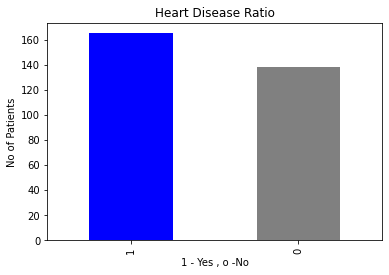

In [60]:
df.target.value_counts().plot(kind='bar',
                              color=['blue','grey'])
plt.title('Heart Disease Ratio')
plt.xlabel('1 - Yes , o -No')
plt.ylabel('No of Patients');

#### Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [37]:
#df.isnull().sum()
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are 'No missing values' as per the above results

In [62]:
df.sex.value_counts()
# sex -0 refers to female , 1 refers to male

1    207
0     96
Name: sex, dtype: int64

In [64]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


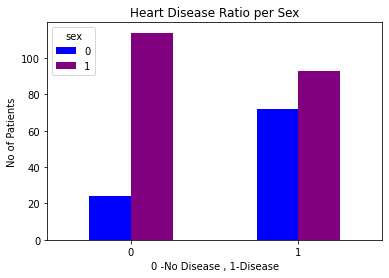

In [78]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   color=['blue','purple'])
plt.title('Heart Disease Ratio per Sex')
plt.xlabel('0 -No Disease , 1-Disease')
plt.ylabel('No of Patients')
plt.xticks(rotation=0);

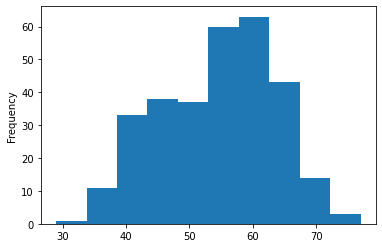

In [81]:
# Age column using Histogram to find Normal distribution & Outliers
df.age.plot.hist();

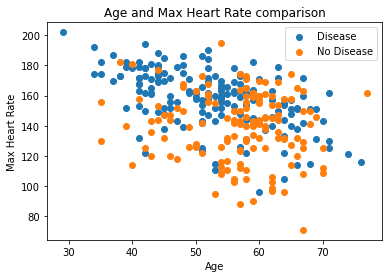

In [87]:
# Compare age and Max Heart Rate  (thalach column) for patients with heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1])

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0])

plt.title ('Age and Max Heart Rate comparison')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

In [88]:
# CP refers to Chestpain Type 
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

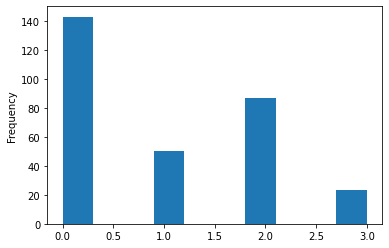

In [89]:
df.cp.plot.hist();

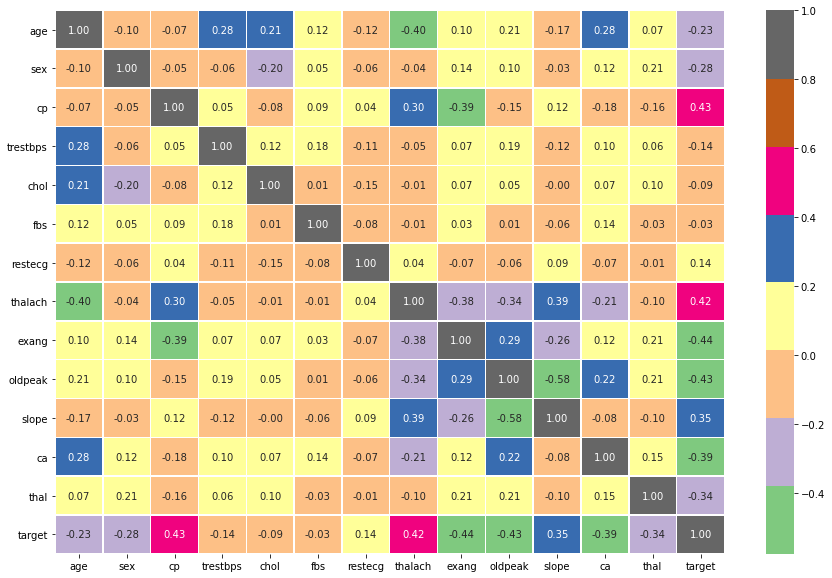

In [104]:
# Create correlation matrix using Seaborn heatmap
corr_matrix=df.corr()
fig, ax =plt.subplots(figsize=(15,10))
ax =sns.heatmap(corr_matrix,
               annot=True,
               fmt='.2f',
               linewidths=0.5,
               cmap='Accent')

### Modelling

In [4]:
# split features and label data
X=df.drop('target', axis=1)
y=df.target

In [5]:
# set unique value for random number
np.random.seed(10)
# Train Test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X.shape, y.shape, X_train.shape ,X_test.shape ,y_train.shape , y_test.shape

((303, 13), (303,), (242, 13), (61, 13), (242,), (61,))

In [65]:
# Create a Dictionary for Machine Learning Algorithms
models={'Logistic Regression':LogisticRegression(max_iter=1000),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier(),
       'Support Vector Classification':SVC()}
models

{'Logistic Regression': LogisticRegression(max_iter=1000),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Classification': SVC()}

In [66]:
# Create a function to fit and score the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(10)
    # Create an empty dictionary to update the model scores
    model_score={}
    # Create loop to pass the models
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score

In [67]:
model_score=fit_and_score(models=models,
            X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test)
model_score

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902,
 'Support Vector Classification': 0.5901639344262295}

In [57]:
compare_model=pd.DataFrame(model_score,index=['Accuracy_score'])
compare_model

,Logistic Regression,KNN,Random Forest,Support Vector Classification
Accuracy_score,0.770492,0.590164,0.803279,0.590164


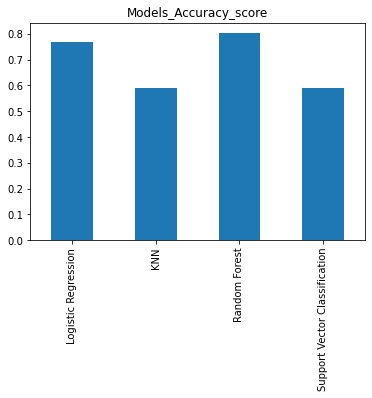

In [64]:
#transpose the row/columns to look better
compare_model.T.plot(kind='bar',legend=False)
plt.title('Models_Accuracy_score');

In [ ]:
# Let's leave KNN and SVC models as of now as it gives less score. 

#### Hyper Parameter Tuning using RandomizedsearchCV (Cross validation)

In [76]:
np.arange(1,20,2)
for i in range(1,20,2):
    print(i)

1
3
5
7
9
11
13
15
17
19


#### Hyper Parameter Tuning using RandomizedsearchCV

In [19]:
#Hyper parameter grid for Logistic Regression
logis_reg_grid={'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

# Hyper parameter grid for Random Forest Classifier
ran_for_grid={'n_estimators':np.arange(10,50,100),
             'max_depth':[None,3,5,10],
             'min_samples_split':np.arange(2,20,2),
             'min_samples_leaf':np.arange(1,20,2)}

In [20]:
# Tune LS model
cv_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=logis_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

cv_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
cv_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
cv_log_reg.score(X_test,y_test)

0.7704918032786885

In [ ]:
# We don't see any improvement for LS model

In [26]:
# Tune RF model
ran_for_reg=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=ran_for_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
ran_for_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10])},
                   verbose=True)

In [29]:
ran_for_reg.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [30]:
ran_for_reg.score(X_test,y_test)

0.819672131147541

In [ ]:
# There is an improvement in the score 

#### Hyper Parameter tuning using GridSearchCV 

In [34]:
#Hyper parameter grid for Logistic Regression
log_reg_grid={'C':np.logspace(-4,4,30),
               'solver':['liblinear']}
 
gs_log_reg=GridSearchCV(LogisticRegression(),
                             param_grid=log_reg_grid,
                             cv=5,
                             verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(X_test,y_test)

0.7704918032786885

In [ ]:
# There is No improvement in the score. We need to try with different params.

In [102]:
#Hyper parameter grid for Random Forest Calssifier

ran_for_grid={'n_estimators':np.arange(10,50,100),
             'max_depth':[None,5],
             'min_samples_split':np.arange(2,50,2),
             'min_samples_leaf':np.arange(1,30,2)}
 
gs_rf=GridSearchCV(RandomForestClassifier(),
                              param_grid=ran_for_grid,
                              cv=5,
                              verbose=True)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': array([10])},
             verbose=True)

In [105]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 30,
 'n_estimators': 10}

In [106]:
gs_rf.score(X_test,y_test)

0.8360655737704918

In [107]:
y_preds=gs_rf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

#### Evaluating the model

### The above "Random forest classifier " gridsearch cv gives better score among all the models based on Hyper parameter Tuning

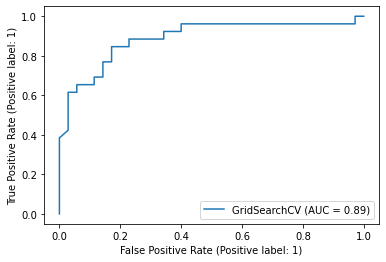

In [108]:
# plot roc curve and find AUC metric
plot_roc_curve(gs_rf,X_test,y_test);

In [109]:
confusion_matrix(y_test,y_preds)

array([[29,  6],
       [ 4, 22]], dtype=int64)

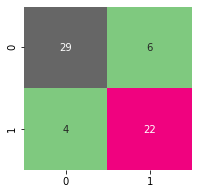

In [110]:
# Create correlation matrix using Seaborn heatmap

def confusion_matrix_plot(y_test,y_preds):
    fig, ax =plt.subplots(figsize=(3,3))
    ax =sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False,
                    cmap='Accent')
    #plt.xlabel("Predicted value")
    #plt.ylabel("True value")
    
confusion_matrix_plot(y_test,y_preds)

In [111]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.79      0.85      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [112]:
# find best hyper parameter from above trials
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 30,
 'n_estimators': 10}

In [113]:
rf= RandomForestClassifier(n_estimators=10,
                           max_depth=5,
                          min_samples_split=30,
                          min_samples_leaf=7)
rf

RandomForestClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=30,
                       n_estimators=10)

In [114]:
#cross_validation accuracy
cv_accuracy= cross_val_score(rf, X, y, cv=5, scoring='accuracy') 
cv_accuracy

array([0.81967213, 0.8852459 , 0.83606557, 0.76666667, 0.73333333])

In [115]:
cv_accuracy=np.mean(cv_accuracy)
cv_accuracy

0.8081967213114755

In [116]:
# cross_validation precision
cv_precision= np.mean(cross_val_score(rf, X, y, cv=5, scoring='precision'))
cv_precision

0.8391178927711437

In [117]:
# cross_validation recall
cv_recall= np.mean(cross_val_score(rf, X, y, cv=5, scoring='recall'))
cv_recall

0.8727272727272727

In [118]:
# cross_validation f1 score
cv_f1score= np.mean(cross_val_score(rf, X, y, cv=5, scoring='f1'))
cv_f1score

0.8497043766673877

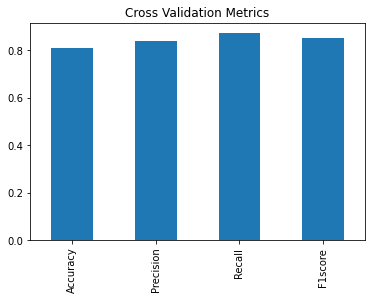

In [119]:
# cross validation metrics 
cv_metrics=pd.DataFrame({'Accuracy':cv_accuracy,
                         'Precision':cv_precision,
                         'Recall':cv_recall,
                         'F1score':cv_f1score},
                        index=[0])
cv_metrics.T.plot.bar(title='Cross Validation Metrics',
                     legend=False);

#### Feature Importance
##### Identify which features contribute more in the model to find patterns and better accuracy

In [121]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 30,
 'n_estimators': 10}

In [122]:
rf= RandomForestClassifier(n_estimators=10,
                           max_depth=5,
                          min_samples_split=30,
                          min_samples_leaf=7)
rf

rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=30,
                       n_estimators=10)

In [123]:
rf.feature_importances_

array([0.03006876, 0.06299851, 0.32374395, 0.00501047, 0.00760103,
       0.00042189, 0.00555106, 0.08059674, 0.0274905 , 0.08367932,
       0.02527788, 0.19528096, 0.15227893])

In [124]:
feature_impt=dict(zip(df.columns,list(rf.feature_importances_)))
feature_impt

{'age': 0.030068761206196875,
 'sex': 0.06299850890618333,
 'cp': 0.32374394849559335,
 'trestbps': 0.005010465875178522,
 'chol': 0.00760103155932763,
 'fbs': 0.0004218939648881709,
 'restecg': 0.005551057564152742,
 'thalach': 0.08059674494446167,
 'exang': 0.027490498409194843,
 'oldpeak': 0.08367932278655281,
 'slope': 0.025277884772502517,
 'ca': 0.1952809559044314,
 'thal': 0.1522789256113363}

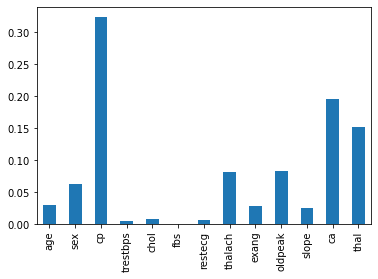

In [125]:
feature_df=pd.DataFrame(feature_impt,index=[0])

feature_df.T.plot.bar(legend=False);

#### Positively correlated columns with the label (target)
* CP (Chest Pain Type), 
* ca(number of major vessels),
* thala

### Conclusion

* We have got an maximum score of 81% with 'Random Forest Classifier'. In order to get better score, 
** We may need to collect more data
** We may need to try with different classification models
** We may need to try with different parameters in Hyper parameter tuning for the current model  

#### Save and load model

In [127]:
import pickle

pickle.dump(gs_rf, open('Heart_Disease_Predict_Random_Forest_Classifer_model.pk1','wb'))

In [128]:
loaded_model=pickle.load(open('Heart_Disease_Predict_Random_Forest_Classifer_model.pk1','rb'))
loaded_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': array([10])},
             verbose=True)

In [129]:
from joblib import dump, load

dump(gs_rf , filename='Heart_Disease_Predict_Random_Forest_Classifer_model1.joblib')

['Heart_Disease_Predict_Random_Forest_Classifer_model1.joblib']

In [132]:
loaded_model=load(filename='Heart_Disease_Predict_Random_Forest_Classifer_model1.joblib')
loaded_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': array([10])},
             verbose=True)